<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [476]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [477]:
# Load the data
house = pd.read_csv('./housing.csv')

In [478]:
house.head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000


MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [238]:
# A:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [239]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [240]:
house.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [241]:
df = house.groupby('MSZoning')['Id'].nunique()
df

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: Id, dtype: int64

In [242]:
house[house.MSZoning == 'C (all)']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
557,558,50,C (all),60.0,11040,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,9,2006,COD,Normal,108000
711,712,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,102776
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1279,1280,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml,68400


In [243]:
house.drop(house.index[[30,88,93,495,557,711,812,916,1061,1279]],inplace=True)

In [244]:
house[house.MSZoning == 'C (all)']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [245]:
house.shape

(1450, 81)

In [246]:
house.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1450.000000,1450.000000,1450,1191.000000,1450.000000,1450,89,1450,1450,1450,...,1450.000000,7,278,52,1450.000000,1450.000000,1450.000000,1450,1450,1450.000000
unique,NaN,NaN,4,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1446,50,916,1305,1449,...,NaN,3,155,47,NaN,NaN,NaN,1261,1194,NaN
mean,731.364138,56.903448,NaN,70.052897,10523.831724,NaN,NaN,NaN,NaN,NaN,...,2.777931,NaN,NaN,NaN,43.365517,6.312414,2007.812414,NaN,NaN,181654.942069
std,421.554345,42.265033,NaN,24.301013,10012.185355,NaN,NaN,NaN,NaN,NaN,...,40.315051,NaN,NaN,NaN,497.636495,2.698244,1.326321,NaN,NaN,79176.485241
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,37900.000000
25%,366.250000,20.000000,NaN,59.000000,7544.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,130000.000000
50%,731.500000,50.000000,NaN,70.000000,9496.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163945.000000
75%,1096.750000,70.000000,NaN,80.000000,11613.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [247]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1361
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       681
GarageType         79
GarageYrBlt        79
GarageFinish       79
GarageCars          0
GarageArea          0
GarageQual         79
GarageCond         79
PavedDrive

In [248]:
null_value=[house.isnull().sum()>len(house)*0.4]
null_value

[Id               False
 MSSubClass       False
 MSZoning         False
 LotFrontage      False
 LotArea          False
 Street           False
 Alley             True
 LotShape         False
 LandContour      False
 Utilities        False
 LotConfig        False
 LandSlope        False
 Neighborhood     False
 Condition1       False
 Condition2       False
 BldgType         False
 HouseStyle       False
 OverallQual      False
 OverallCond      False
 YearBuilt        False
 YearRemodAdd     False
 RoofStyle        False
 RoofMatl         False
 Exterior1st      False
 Exterior2nd      False
 MasVnrType       False
 MasVnrArea       False
 ExterQual        False
 ExterCond        False
 Foundation       False
                  ...  
 BedroomAbvGr     False
 KitchenAbvGr     False
 KitchenQual      False
 TotRmsAbvGrd     False
 Functional       False
 Fireplaces       False
 FireplaceQu       True
 GarageType       False
 GarageYrBlt      False
 GarageFinish     False
 GarageCars     

In [249]:
#drop columns with null values of more than 40% of its length
house.drop(labels=['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'], axis=1,inplace=True)

In [250]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1450.000000,1450.000000,1191.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1442.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,731.364138,56.903448,70.052897,10523.831724,6.114483,5.582069,1971.593103,1985.049655,104.404300,445.162759,...,94.826897,46.537931,21.536552,3.433103,15.096552,2.777931,43.365517,6.312414,2007.812414,181654.942069
std,421.554345,42.265033,24.301013,10012.185355,1.372860,1.107330,30.022696,20.552319,181.486539,456.353871,...,125.560863,65.222761,60.838826,29.416948,55.893399,40.315051,497.636495,2.698244,1.326321,79176.485241
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,366.250000,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,731.500000,50.000000,70.000000,9496.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163945.000000
75%,1096.750000,70.000000,80.000000,11613.500000,7.000000,6.000000,2001.000000,2004.000000,166.750000,713.750000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [251]:
value_count=[house.count()<1450]
value_count

[Id               False
 MSSubClass       False
 MSZoning         False
 LotFrontage       True
 LotArea          False
 Street           False
 LotShape         False
 LandContour      False
 Utilities        False
 LotConfig        False
 LandSlope        False
 Neighborhood     False
 Condition1       False
 Condition2       False
 BldgType         False
 HouseStyle       False
 OverallQual      False
 OverallCond      False
 YearBuilt        False
 YearRemodAdd     False
 RoofStyle        False
 RoofMatl         False
 Exterior1st      False
 Exterior2nd      False
 MasVnrType        True
 MasVnrArea        True
 ExterQual        False
 ExterCond        False
 Foundation       False
 BsmtQual          True
                  ...  
 BsmtFullBath     False
 BsmtHalfBath     False
 FullBath         False
 HalfBath         False
 BedroomAbvGr     False
 KitchenAbvGr     False
 KitchenQual      False
 TotRmsAbvGrd     False
 Functional       False
 Fireplaces       False
 GarageType     

Remaining Features with less than 1450 counts.
LotFrontage       True
MasVnrType        True
MasVnrArea        True
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True    
Electrical        True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageQual        True
GarageCond        True

In [252]:
house[['LotFrontage'
,'MasVnrType'        
,'MasVnrArea'        
,'BsmtQual'          
,'BsmtCond'          
,'BsmtExposure'      
,'BsmtFinType1'      
,'BsmtFinType2'          
,'Electrical'        
,'GarageType'        
,'GarageYrBlt'       
,'GarageFinish'      
,'GarageQual'        
,'GarageCond']].describe(include='all')

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
count,1191.000000,1442,1442.000000,1413,1413,1412,1413,1412,1449,1371,1371.000000,1371,1371,1371
unique,NaN,4,NaN,4,4,4,6,6,5,6,NaN,3,5,5
top,NaN,None,NaN,TA,TA,No,Unf,Unf,SBrkr,Attchd,NaN,Unf,TA,TA
freq,NaN,854,NaN,639,1303,947,424,1246,1328,870,NaN,600,1303,1319
mean,70.052897,NaN,104.404300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978.627279,NaN,NaN,NaN
std,24.301013,NaN,181.486539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.592779,NaN,NaN,NaN
min,21.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1906.000000,NaN,NaN,NaN
25%,59.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.500000,NaN,NaN,NaN
50%,70.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980.000000,NaN,NaN,NaN
75%,80.000000,NaN,166.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN


In [253]:
less_count=house[['Id','LotFrontage'
,'MasVnrType'        
,'MasVnrArea'        
,'BsmtQual'          
,'BsmtCond'          
,'BsmtExposure'      
,'BsmtFinType1'      
,'BsmtFinType2'          
,'Electrical'        
,'GarageType'        
,'GarageYrBlt'       
,'GarageFinish'      
,'GarageQual'        
,'GarageCond']]
less_count.head()

,Id,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,1,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,2,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,3,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,4,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,5,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


In [254]:
print('LotFrontage:',less_count.groupby('LotFrontage')['Id'].nunique())

('LotFrontage:', LotFrontage
21.0     23
24.0     19
30.0      6
32.0      5
33.0      1
34.0     10
35.0      9
36.0      6
37.0      5
38.0      1
39.0      1
40.0     12
41.0      6
42.0      4
43.0     12
44.0      9
45.0      3
46.0      1
47.0      5
48.0      6
49.0      4
50.0     55
51.0     15
52.0     14
53.0     10
54.0      6
55.0     17
56.0      5
57.0     12
58.0      7
         ..
109.0     2
110.0     6
111.0     1
112.0     1
114.0     2
115.0     2
116.0     2
118.0     2
120.0     6
121.0     2
122.0     2
124.0     2
128.0     1
129.0     2
130.0     3
134.0     2
137.0     1
138.0     1
140.0     1
141.0     1
144.0     1
149.0     1
150.0     1
152.0     1
153.0     1
160.0     1
168.0     1
174.0     2
182.0     1
313.0     2
Name: Id, Length: 110, dtype: int64)


In [255]:
house['LotFrontage'].isnull().sum()

259

In [256]:
house['LotFrontage'].fillna(house['LotFrontage'].mean(), inplace=True)
house['LotFrontage'].isnull().sum()

0

In [257]:
print('MasVnrType:',less_count.groupby('MasVnrType')['Id'].nunique())

('MasVnrType:', MasVnrType
BrkCmn      15
BrkFace    445
None       854
Stone      128
Name: Id, dtype: int64)


In [258]:
house['MasVnrType'].fillna('None', inplace=True)
house['MasVnrType'].isnull().sum()

0

In [259]:
print('MasVnrArea:',less_count.groupby('MasVnrArea')['Id'].nunique())

('MasVnrArea:', MasVnrArea
0.0       851
1.0         2
11.0        1
14.0        1
16.0        7
18.0        2
22.0        1
24.0        1
27.0        1
28.0        1
30.0        2
31.0        1
32.0        1
34.0        1
36.0        1
38.0        1
40.0        4
41.0        1
42.0        3
44.0        3
45.0        2
46.0        1
48.0        1
50.0        3
51.0        1
53.0        1
54.0        2
56.0        1
57.0        1
60.0        2
         ... 
650.0       2
651.0       1
653.0       1
660.0       2
664.0       1
673.0       1
705.0       1
731.0       1
748.0       1
760.0       1
762.0       1
766.0       1
768.0       1
772.0       1
788.0       1
796.0       1
816.0       1
860.0       1
870.0       1
894.0       1
921.0       1
922.0       1
975.0       1
1031.0      1
1047.0      1
1115.0      1
1129.0      1
1170.0      1
1378.0      1
1600.0      1
Name: Id, Length: 327, dtype: int64)


In [260]:
house['MasVnrArea'].fillna(house['MasVnrArea'].mean(), inplace=True)
house['MasVnrArea'].isnull().sum()

0

In [261]:
print('BsmtQual:',less_count.groupby('BsmtQual')['Id'].nunique())

('BsmtQual:', BsmtQual
Ex    121
Fa     35
Gd    618
TA    639
Name: Id, dtype: int64)


In [262]:
house['BsmtQual'].fillna('Nb', inplace=True)
house['BsmtQual'].isnull().sum()

0

In [263]:
print('BsmtCond:',less_count.groupby('BsmtCond')['Id'].nunique())

('BsmtCond:', BsmtCond
Fa      43
Gd      65
Po       2
TA    1303
Name: Id, dtype: int64)


In [264]:
house['BsmtCond'].fillna('Nb', inplace=True)
house['BsmtCond'].isnull().sum()

0

In [265]:
print('BsmtExposure:',less_count.groupby('BsmtExposure')['Id'].nunique())

('BsmtExposure:', BsmtExposure
Av    219
Gd    134
Mn    112
No    947
Name: Id, dtype: int64)


In [266]:
house['BsmtExposure'].fillna('Nb', inplace=True)
house['BsmtExposure'].isnull().sum()

0

In [267]:
print('BsmtFinType1:',less_count.groupby('BsmtFinType1')['Id'].nunique())

('BsmtFinType1:', BsmtFinType1
ALQ    220
BLQ    147
GLQ    418
LwQ     74
Rec    130
Unf    424
Name: Id, dtype: int64)


In [268]:
house['BsmtFinType1'].fillna('Nb', inplace=True)
house['BsmtFinType1'].isnull().sum()

0

In [269]:
print('BsmtFinType2:',less_count.groupby('BsmtFinType2')['Id'].nunique())

('BsmtFinType2:', BsmtFinType2
ALQ      19
BLQ      33
GLQ      14
LwQ      46
Rec      54
Unf    1246
Name: Id, dtype: int64)


In [270]:
house['BsmtFinType2'].fillna('Nb', inplace=True)
house['BsmtFinType2'].isnull().sum()

0

In [271]:
print('Electrical:',less_count.groupby('Electrical')['Id'].nunique())

('Electrical:', Electrical
FuseA      90
FuseF      27
FuseP       3
Mix         1
SBrkr    1328
Name: Id, dtype: int64)


In [272]:
house['Electrical'].fillna('SBrkr', inplace=True)
house['Electrical'].isnull().sum()

0

In [273]:
print('GarageYrBlt:',less_count.groupby('GarageYrBlt')['Id'].nunique())

('GarageYrBlt:', GarageYrBlt
1906.0     1
1908.0     1
1910.0     3
1914.0     2
1915.0     2
1916.0     5
1918.0     2
1920.0    13
1921.0     3
1922.0     5
1923.0     3
1924.0     3
1925.0    10
1926.0     6
1927.0     1
1928.0     4
1929.0     2
1930.0     8
1931.0     4
1932.0     3
1933.0     1
1934.0     2
1935.0     4
1936.0     5
1937.0     2
1938.0     3
1939.0     9
1940.0    14
1941.0    10
1942.0     2
          ..
1981.0    10
1982.0     4
1983.0     7
1984.0     8
1985.0    10
1986.0     6
1987.0    11
1988.0    14
1989.0    10
1990.0    16
1991.0     9
1992.0    13
1993.0    22
1994.0    16
1995.0    18
1996.0    20
1997.0    19
1998.0    31
1999.0    30
2000.0    27
2001.0    20
2002.0    26
2003.0    50
2004.0    53
2005.0    65
2006.0    59
2007.0    49
2008.0    29
2009.0    21
2010.0     3
Name: Id, Length: 96, dtype: int64)


In [274]:
house['GarageYrBlt'].fillna(house['GarageYrBlt'].median(), inplace=True)
house['GarageYrBlt'].isnull().sum()

0

In [275]:
print('GarageFinish:',less_count.groupby('GarageFinish')['Id'].nunique())

('GarageFinish:', GarageFinish
Fin    352
RFn    419
Unf    600
Name: Id, dtype: int64)


In [276]:
house['GarageFinish'].fillna('Ng', inplace=True)
house['GarageFinish'].isnull().sum()

0

In [277]:
print('GarageQual:',less_count.groupby('GarageQual')['Id'].nunique())

('GarageQual:', GarageQual
Ex       3
Fa      48
Gd      14
Po       3
TA    1303
Name: Id, dtype: int64)


In [278]:
house['GarageQual'].fillna('Ng', inplace=True)
house['GarageQual'].isnull().sum()

0

In [279]:
print('GarageCond:',less_count.groupby('GarageCond')['Id'].nunique())

('GarageCond:', GarageCond
Ex       2
Fa      34
Gd       9
Po       7
TA    1319
Name: Id, dtype: int64)


In [280]:
house['GarageCond'].fillna('Ng', inplace=True)
house['GarageCond'].isnull().sum()

0

In [281]:
house.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1450.000000,1450.000000,1450,1450.000000,1450.000000,1450,1450,1450,1450,1450,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450,1450,1450.000000
unique,NaN,NaN,4,NaN,NaN,2,4,4,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1446,916,1305,1449,1044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1261,1194,NaN
mean,731.364138,56.903448,NaN,70.052897,10523.831724,NaN,NaN,NaN,NaN,NaN,...,21.536552,3.433103,15.096552,2.777931,43.365517,6.312414,2007.812414,NaN,NaN,181654.942069
std,421.554345,42.265033,NaN,22.022350,10012.185355,NaN,NaN,NaN,NaN,NaN,...,60.838826,29.416948,55.893399,40.315051,497.636495,2.698244,1.326321,NaN,NaN,79176.485241
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,37900.000000
25%,366.250000,20.000000,NaN,60.000000,7544.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,130000.000000
50%,731.500000,50.000000,NaN,70.052897,9496.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN,163945.000000
75%,1096.750000,70.000000,NaN,79.000000,11613.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [282]:
house.describe(include=['O']).columns.values

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], dtype=object)

In [283]:
#two potential targets `SalePrice` or 'SalesCondition` will not be included in house_dummy (X) but for training
pricecondition2009=house[house['YrSold']!=2010][['SaleCondition','SalePrice']]
pricecondition2009.shape

(1278, 2)

In [284]:
pricecondition2010=house[house['YrSold']==2010][['SaleCondition','SalePrice']]
pricecondition2010.shape
#we still have the 1450 rows of residential properties in total

(172, 2)

In [285]:
house_dummy=pd.get_dummies(house, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType'])
house_dummy.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,0,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,0,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,0,0,0,0,0,0,0,0,1


In [286]:
house_dummy.columns

Index([u'Id', u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1',
       ...
       u'PavedDrive_Y', u'SaleType_COD', u'SaleType_CWD', u'SaleType_Con',
       u'SaleType_ConLD', u'SaleType_ConLI', u'SaleType_ConLw',
       u'SaleType_New', u'SaleType_Oth', u'SaleType_WD'],
      dtype='object', length=274)

In [287]:
house_dummy.drop(labels=['SaleCondition'], axis=1,inplace=True)

In [288]:
#Finding Correlation between the features
corr=house_dummy.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
Id,1.000000,0.015291,-0.010347,-0.034304,-0.030440,0.010907,-0.017656,-0.021695,-0.051613,-0.003892,...,-0.008916,-0.009369,0.021172,-0.016436,0.002159,-0.059096,-0.020933,-0.019693,0.038967,0.027594
MSSubClass,0.015291,1.000000,-0.358472,-0.139725,0.028891,-0.063504,0.030056,0.035989,0.022930,-0.074762,...,-0.052620,-0.033781,0.028752,0.029113,0.105191,-0.001258,0.014057,-0.045408,-0.014624,0.024471
LotFrontage,-0.010347,-0.358472,1.000000,0.306508,0.238974,-0.050316,0.118896,0.082554,0.180060,0.218682,...,0.085364,-0.010694,-0.006099,-0.030476,-0.000595,0.012713,-0.051978,0.127026,-0.023550,-0.085020
LotArea,-0.034304,-0.139725,0.306508,1.000000,0.106457,-0.006074,0.012958,0.013475,0.103715,0.214794,...,0.008218,-0.015483,-0.007858,-0.002899,-0.012275,0.001035,-0.015087,0.019841,-0.005756,-0.001441
OverallQual,-0.030440,0.028891,0.238974,0.106457,1.000000,-0.107874,0.567392,0.544850,0.408804,0.235139,...,0.217888,-0.056673,0.033936,0.037520,0.001440,0.003665,-0.022052,0.327720,-0.059095,-0.240845
OverallCond,0.010907,-0.063504,-0.050316,-0.006074,-0.107874,1.000000,-0.390446,0.067475,-0.132529,-0.053095,...,-0.085450,-0.025802,0.031736,-0.019542,-0.027635,0.000953,-0.020303,-0.159378,-0.051365,0.157311
YearBuilt,-0.017656,0.030056,0.118896,0.012958,0.567392,-0.390446,1.000000,0.590105,0.311853,0.248222,...,0.427841,-0.055218,-0.029517,0.036415,-0.019610,0.002365,-0.024290,0.347063,0.011743,-0.252114
YearRemodAdd,-0.021695,0.035989,0.082554,0.013475,0.544850,0.067475,0.590105,1.000000,0.175676,0.123137,...,0.177726,-0.141560,-0.009727,0.028853,-0.002105,0.010738,-0.040799,0.325639,-0.011930,-0.193183
MasVnrArea,-0.051613,0.022930,0.180060,0.103715,0.408804,-0.132529,0.311853,0.175676,1.000000,0.262731,...,0.147264,0.008012,-0.018141,-0.021447,0.012603,0.015215,-0.023151,0.168227,-0.026276,-0.135125
BsmtFinSF1,-0.003892,-0.074762,0.218682,0.214794,0.235139,-0.053095,0.248222,0.123137,0.262731,1.000000,...,0.187626,-0.026983,0.008801,0.030659,-0.005172,0.022596,-0.018073,0.044014,0.010530,-0.028900


In [289]:
corr.iloc[:,-1]

Id                    0.027594
MSSubClass            0.024471
LotFrontage          -0.085020
LotArea              -0.001441
OverallQual          -0.240845
OverallCond           0.157311
YearBuilt            -0.252114
YearRemodAdd         -0.193183
MasVnrArea           -0.135125
BsmtFinSF1           -0.028900
BsmtFinSF2            0.034941
BsmtUnfSF            -0.199531
TotalBsmtSF          -0.218220
1stFlrSF             -0.204524
2ndFlrSF              0.025004
LowQualFinSF          0.045641
GrLivArea            -0.125691
BsmtFullBath          0.018991
BsmtHalfBath          0.024242
FullBath             -0.169526
HalfBath             -0.009229
BedroomAbvGr          0.044006
KitchenAbvGr          0.006839
TotRmsAbvGrd         -0.115141
Fireplaces           -0.033268
GarageYrBlt          -0.236167
GarageCars           -0.201860
GarageArea           -0.217739
WoodDeckSF            0.016112
OpenPorchSF          -0.114179
                        ...   
GarageType_CarPort    0.028836
GarageTy

In [290]:
corr.iloc[:,-1].to_csv('corr.csv')

def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(22,14))

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    plt.show()

correlation_heat_map(house_dummy)


## Split into Training and Testing sets

In [291]:
#predictors for testing
house2010=house_dummy[house_dummy['YrSold'] == 2010]

#predictors for training
house2009=house_dummy[house_dummy['YrSold'] != 2010]

In [292]:
#Training set
house2009.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,0,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,0,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,0,0,0,0,0,0,0,0,1


In [293]:
#Testing set
house2010.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
16,17,20,70.052897,11241,6,7,1970,1970,180.0,578,...,1,0,0,0,0,0,0,0,0,1
24,25,20,70.052897,8246,5,8,1968,2001,0.0,188,...,1,0,0,0,0,0,0,0,0,1
26,27,20,60.000000,7200,5,7,1951,2000,0.0,234,...,1,0,0,0,0,0,0,0,0,1
27,28,20,98.000000,11478,8,5,2007,2008,200.0,1218,...,1,0,0,0,0,0,0,0,0,1
33,34,20,70.000000,10552,5,5,1959,1959,0.0,1018,...,1,0,0,0,0,0,0,0,0,1


## Feature Selection

In [294]:
pricecondition2009['SaleCondition'].shape

(1278,)

In [295]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#Two potential targets `SalePrice` or 'SalesCondition`
#to list the columns used in house_dummy (X)
cols = list(house_dummy.columns)
X = house2009
Y = pricecondition2009['SalePrice']

# Build the selector
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# Train the selector on the data.
skb_f.fit(X, Y)
skb_chi2.fit(X, Y)

# Examine the results.
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
kbest

,feature,f_classif,chi2 score
155,Exterior2nd_Other,inf,1277
266,SaleType_Con,inf,1277
138,Exterior1st_ImStucc,inf,1277
102,Condition2_RRAn,inf,1277
210,Heating_Floor,inf,1277
37,SalePrice,inf,4.3898e+07
166,ExterQual_Ex,5.38671,1023.31
4,OverallQual,5.28431,328.768
270,SaleType_New,5.20833,959.628
78,Neighborhood_NridgHt,4.75843,981.359


#AMES Crtitical Parameters
'LotArea','Neighborhood','BldgType','HouseStyle','RoofMatl','MasVnrType','Foundation','Heating','TotRmsAbvGrd','Fireplaces','GarageType','GarageArea','PoolArea','SaleType','SalePrice'

#After analysing Correlation, SelectKBest and referring to website, I have selected the following 
#thirty-seven features for modeling (including both renovate-able and fixed features)

house2009[["GarageCars","Neighborhood_Sawyer","FullBath","MSZoning_RM","Foundation_Slab","GarageType_Detchd","GarageArea","LotShape_IR3","MiscVal","Street_Pave","Foundation_CBlock","GarageFinish_Unf","Neighborhood_Veenker","SaleType_New","YrSold","BsmtExposure_No","Exterior1st_Wd Sdng","HouseStyle_1.5Fin","Exterior1st_HdBoard","Neighborhood_NridgHt","BsmtFinType1_BLQ","LandSlope_Mod","Exterior2nd_Wd Sdng","LotArea","Exterior2nd_Plywood","Heating_Grav","BsmtFinType1_ALQ","Street_Grvl","Exterior2nd_HdBoard","Neighborhood_NoRidge","HeatingQC_Gd","MasVnrType_None","GrLivArea","HeatingQC_TA","Fireplaces","PoolArea","TotRmsAbvGrd"]]

## First Model - Attempting a Combined Approach

In [296]:
#Selecting only "Fixed" features
X=house2009[["Neighborhood_Sawyer","FullBath","MSZoning_RM"
             ,"Foundation_Slab","GarageArea","LotShape_IR3"
             ,"MiscVal","Street_Pave","Foundation_CBlock","GarageFinish_Unf"
             ,"Neighborhood_Veenker","SaleType_New","YrSold","BsmtExposure_No","HouseStyle_1.5Fin"
             ,"Neighborhood_NridgHt","BsmtFinType1_BLQ","LandSlope_Mod","LotArea"
             ,"Neighborhood_NoRidge","GrLivArea","Fireplaces","PoolArea","TotRmsAbvGrd"]]

In [297]:
#twenty-four fixed features are used
X.shape

(1278, 24)

In [298]:
## Build a linear regression predicting SalePrice from the rest of the columns

In [299]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
Xn = mms.fit_transform(X)

# set target 1 as the sale price
target = pricecondition2009.SalePrice.values

In [300]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, Xn, Y, cv=10)

print linreg_scores
print np.mean(linreg_scores)

[0.80014841 0.79505277 0.77982987 0.68693213 0.75461546 0.82970495
 0.78212628 0.67653104 0.54563373 0.76002503]
0.7410599670699369


In [ ]:
#Relatively acceptable score of 0.74

## Find an optimal value for lasso regression alpha using LassoCV

In [301]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xn, Y)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

51.96747267558856


## Cross-validate the lasso R^2 with the optimal alpha

In [302]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xn, Y, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[0.79247907 0.79765147 0.77827478 0.70495973 0.74859926 0.83234748
 0.78222631 0.68529555 0.55206128 0.76595224]
0.7439847173448959


## Look at the coefficients for variables in the lasso

In [303]:
lasso.fit(Xn, Y)

Lasso(alpha=51.96747267558856, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [304]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
20,298984.104575,298984.104575,GrLivArea
4,97246.073235,97246.073235,GarageArea
18,72150.313902,72150.313902,LotArea
19,68786.316669,68786.316669,Neighborhood_NoRidge
15,59881.132400,59881.132400,Neighborhood_NridgHt
3,56766.523535,-56766.523535,Foundation_Slab
21,43315.381457,43315.381457,Fireplaces
10,33680.354090,33680.354090,Neighborhood_Veenker
11,30970.922486,30970.922486,SaleType_New
5,30330.320884,-30330.320884,LotShape_IR3


In [305]:
print 'Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X.shape[0])

Percent variables zeroed out: 0.002347417840375587


## Find an optimal value for elastic net regression alpha using ElasticNetCV

In [306]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
optimal_enet.fit(Xn, Y)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

52.46395990699494
1.0


## Cross-validate the elastic net  R2R2  with the optimal alpha and l1_ratio

In [307]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xn, Y, cv=10)

print enet_scores
print np.mean(enet_scores)

[0.79240036 0.79764686 0.77818286 0.70508162 0.74853569 0.83234594
 0.78221704 0.68536966 0.55209925 0.76598354]
0.7439862823773767


#enet and lasso give similar R^2 given the same features

## Regression Models
More than 2 classes in Y, not performing Logistic Regression

In [313]:
#Linear Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict

# instantiate the model
lr = LinearRegression()

# score the model with cross validation = 5
lr_model_scores = cross_val_score(lr, X_train, y_train, cv = 5)

# print the results
print('The linear model R^2 mean is: {0:.4g}'.format(lr_model_scores.mean()))

The linear model R^2 mean is: 0.727


In [314]:
# score the model with cross validation = 3
lr_model_scores = cross_val_score(lr, X_train, y_train, cv = 3)

# print the results
print('The linear model R^2 mean is: {0:.4g}'.format(lr_model_scores.mean()))

The linear model R^2 mean is: 0.6704


In [315]:
# score the model with cross validation = 10
lr_model_scores = cross_val_score(lr, X_train, y_train, cv = 10)

# print the results
print('The linear model R^2 mean is: {0:.4g}'.format(lr_model_scores.mean()))

The linear model R^2 mean is: 0.7155


In [384]:
house2010_selected=house2010[["Neighborhood_Sawyer","FullBath","MSZoning_RM"
             ,"Foundation_Slab","GarageArea","LotShape_IR3"
             ,"MiscVal","Street_Pave","Foundation_CBlock","GarageFinish_Unf"
             ,"Neighborhood_Veenker","SaleType_New","YrSold","BsmtExposure_No","HouseStyle_1.5Fin"
             ,"Neighborhood_NridgHt","BsmtFinType1_BLQ","LandSlope_Mod","LotArea"
             ,"Neighborhood_NoRidge","GrLivArea","Fireplaces","PoolArea","TotRmsAbvGrd"]]
house2010_selected.shape

(172, 24)

In [387]:
y=pricecondition2010[['SalePrice']]
y.shape

(172, 1)

## Fit the model using statsmodels

In [423]:
Y.shape

(1278,)

In [425]:
Xn.shape

(1278, 24)

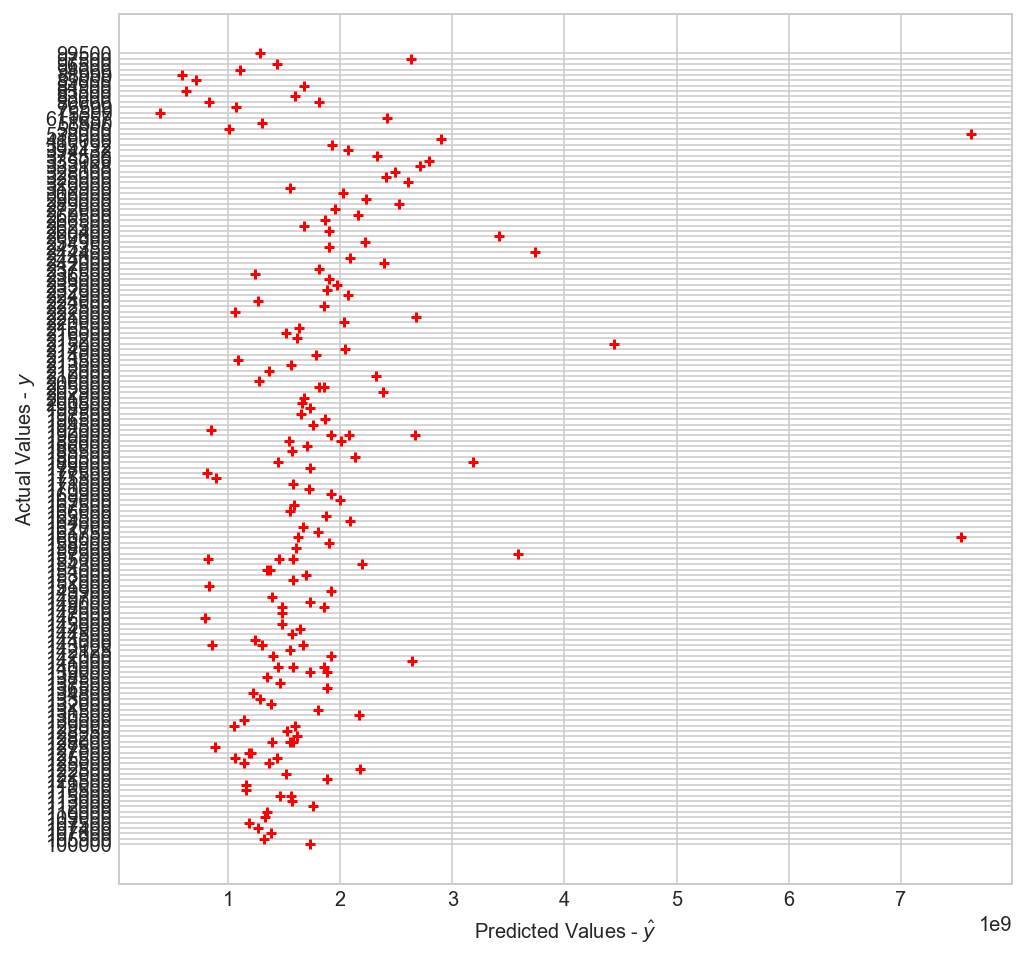

MSE: 3.8710267155847844e+18


In [417]:
import statsmodels.api as sm

model = sm.OLS(Y, Xn)
model = model.fit()
predictions = model.predict(house2010_selected)

# Plot the model.
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

#Predicted values of Y is ridiculously large

In [418]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1321.
Date:                Thu, 05 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:02:36   Log-Likelihood:                -15314.
No. Observations:                1278   AIC:                         3.068e+04
Df Residuals:                    1254   BIC:                         3.080e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1857.6946   5452.659     -0.341      0.733   -1.26e+04    8839.646
x2          2.301e+04   8615.416      2.671      0.008    6109.052    3.99e+04
x3         -1.595e+04   3384.952     -4.711      0.000   -2.26e+04   -9307.071
x4         -5.904e+04   9029.685     -6.538      0.000   -7.68e+04   -4.13e+04
x5          9.633e+04   9290.572     10.368      0.000    7.81e+04    1.15e+05
x6         -4.437e+04    1.3e+04     -3.412      0.001   -6.99e+04   -1.89e+04
x7         -7571.3990   3.36e+04     -0.225      0.822   -7.35e+04    5.83e+04
x8           7.85e+04   5710.373     13.746      0.000    6.73e+04    8.97e+04
x9         -1.175e+04   2613.442     -4.495      0.000   -1.69e+04   -6621.523
x10        -1.192e+04   2678.859     -4.448      0.000   -1.72e+04   -6660.957
x11         3.823e+04    1.2e+04      3.184      0.001    1.47e+04    6.18e+04
x12         3.153e+04   4314.628      7.307      0.000    2.31e+04       4e+04
x13         3357.7106   2970.573      1.130      0.259   -2470.131    9185.552
x14        -1.713e+04   2507.600     -6.832      0.000   -2.21e+04   -1.22e+04
x15        -1.161e+04   3892.636     -2.983      0.003   -1.92e+04   -3972.991
x16          6.08e+04   5324.888     11.418      0.000    5.04e+04    7.12e+04
x17          -65.8211   3862.428     -0.017      0.986   -7643.355    7511.712
x18         8222.4851   5439.408      1.512      0.131   -2448.859    1.89e+04
x19         1.211e+05   2.52e+04      4.813      0.000    7.18e+04     1.7e+05
x20         6.831e+04   7476.568      9.136      0.000    5.36e+04     8.3e+04
x21         3.236e+05   2.52e+04     12.830      0.000    2.74e+05    3.73e+05
x22         4.173e+04   6083.394      6.860      0.000    2.98e+04    5.37e+04
x23        -1.138e+04   1.95e+04     -0.585      0.559   -4.96e+04    2.68e+04
x24        -2.972e+04    1.5e+04     -1.980      0.048   -5.92e+04    -268.734
==============================================================================
Omnibus:                      297.332   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13504.045
Skew:                           0.011   Prob(JB):                         0.00
Kurtosis:                      18.925   Cond. No.                         51.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The model has an R2 of 0.962 (somewhere is wrong???), which means that the twenty-four predictor variables we have chosen explain 96.2% of the variance in the target variable not explained by the baseline model.

## Second Model - Attempt using features from SelectKBest

In [451]:
#Selecting only "Fixed" features
X_k=house2009[['ExterQual_Ex','SaleType_New','Neighborhood_NridgHt','Heating_Grav'
               ,'MiscVal','Neighborhood_NoRidge','GrLivArea']]

X_kactual=house2010[['ExterQual_Ex','SaleType_New','Neighborhood_NridgHt','Heating_Grav'
               ,'MiscVal','Neighborhood_NoRidge','GrLivArea']]

In [452]:
X_k.shape

(1278, 7)

In [453]:
## Build a linear regression predicting SalePrice from the rest of the columns

In [454]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
Xn_k = mms.fit_transform(X_k)

# set target 1 as the sale price
target = pricecondition2009.SalePrice.values

In [455]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, Xn_k, Y, cv=10)

print linreg_scores
print np.mean(linreg_scores)

[0.65772042 0.73521509 0.66156898 0.55720318 0.6840389  0.78426094
 0.61505628 0.58187152 0.48741683 0.63342944]
0.6397781567168794


In [456]:
Y.shape

(1278, 1)

In [457]:
Xn_k.shape

(1278, 7)

In [458]:
X_kactual.shape

(172, 7)

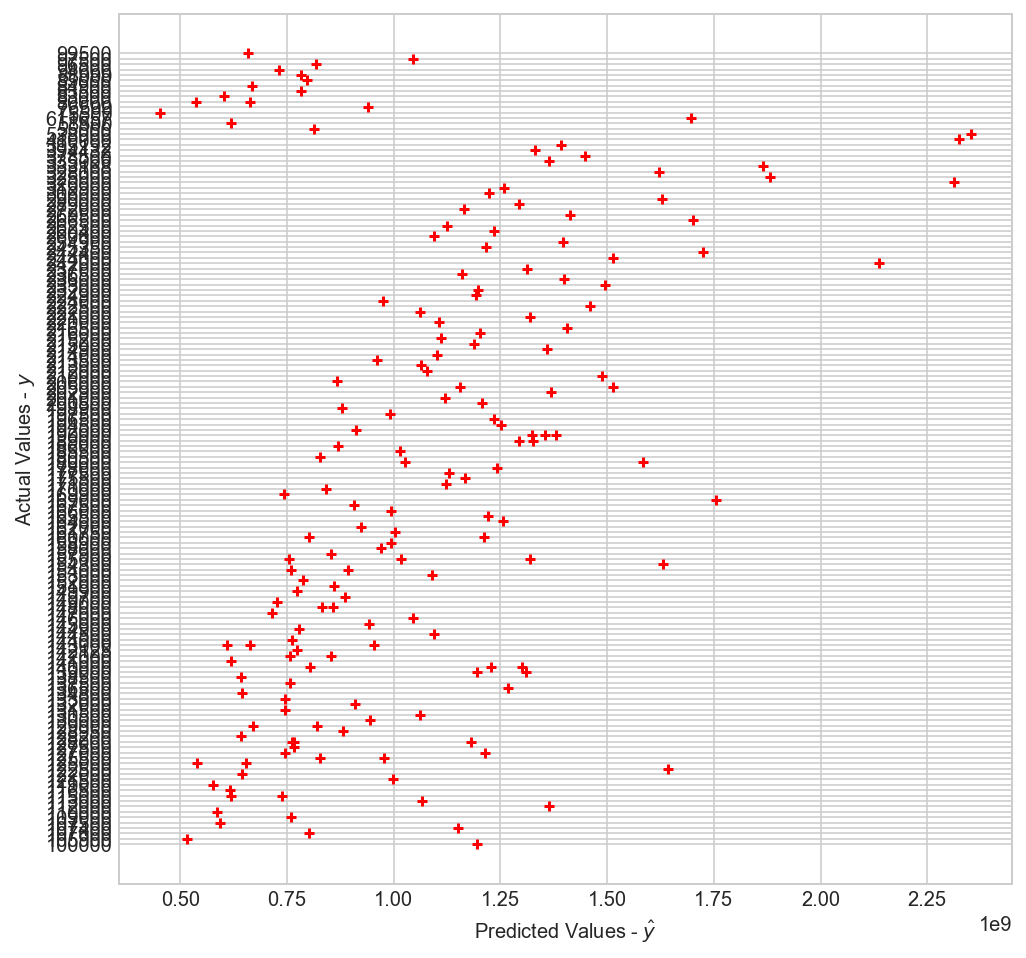

MSE: 1.2675337976796613e+18


In [459]:
import statsmodels.api as sm

model = sm.OLS(Y, Xn_k)
model = model.fit()
predictions = model.predict(X_kactual)

# Plot the model.
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

In [460]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     2239.
Date:                Thu, 05 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:48:44   Log-Likelihood:                -15748.
No. Observations:                1278   AIC:                         3.151e+04
Df Residuals:                    1271   BIC:                         3.155e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.557e+04   9407.708      3.780      0.000    1.71e+04     5.4e+04
x2          4.784e+04   5694.015      8.402      0.000    3.67e+04     5.9e+04
x3          6.805e+04   7579.921      8.977      0.000    5.32e+04    8.29e+04
x4           251.9944   2.23e+04      0.011      0.991   -4.34e+04    4.39e+04
x5          8337.7827   4.63e+04      0.180      0.857   -8.24e+04    9.91e+04
x6           4.31e+04   9808.406      4.394      0.000    2.39e+04    6.23e+04
x7          7.177e+05   7157.452    100.274      0.000    7.04e+05    7.32e+05
==============================================================================
Omnibus:                      814.170   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31256.398
Skew:                          -2.370   Prob(JB):                         0.00
Kurtosis:                      26.759   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The model has an R2 of 0.925 (somewhere is wrong again???), which means that the nine predictor variables we have chosen explain 92.5% of the variance in the target variable not explained by the baseline model.

x4 and x5 have p-score of more than 5%.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

## First Model (Reversed)

#Fixed features used earlier
X=house2009[["Neighborhood_Sawyer","FullBath","MSZoning_RM"
             ,"Foundation_Slab","GarageArea","LotShape_IR3"
             ,"MiscVal","Street_Pave","Foundation_CBlock","GarageFinish_Unf"
             ,"Neighborhood_Veenker","SaleType_New","YrSold","BsmtExposure_No","HouseStyle_1.5Fin"
             ,"Neighborhood_NridgHt","BsmtFinType1_BLQ","LandSlope_Mod","LotArea"
             ,"Neighborhood_NoRidge","GrLivArea","Fireplaces","PoolArea","TotRmsAbvGrd"]]

In [445]:
#Remaining thirteen features be renovate-able features
reno_X=house2009[["GarageCars","GarageType_Detchd","Exterior1st_Wd Sdng"
                  ,"Exterior1st_HdBoard" ,"Exterior2nd_Wd Sdng","Exterior2nd_Plywood","Heating_Grav"
                  ,"BsmtFinType1_ALQ","Street_Grvl","Exterior2nd_HdBoard","HeatingQC_Gd"
                  ,"MasVnrType_None","HeatingQC_TA"]]

reno_X_actual=house2010[["GarageCars","GarageType_Detchd","Exterior1st_Wd Sdng"
                  ,"Exterior1st_HdBoard" ,"Exterior2nd_Wd Sdng","Exterior2nd_Plywood","Heating_Grav"
                  ,"BsmtFinType1_ALQ","Street_Grvl","Exterior2nd_HdBoard","HeatingQC_Gd"
                  ,"MasVnrType_None","HeatingQC_TA"]]

In [345]:
reno_X.shape

(1278, 13)

In [446]:
reno_X_actual.shape

(172, 13)

In [448]:
Y = pricecondition2009[['SalePrice']]
Y.shape

(1278, 1)

In [447]:
y=pricecondition2010[['SalePrice']]
y.shape

(172, 1)

## Objectives:
To have high profit in selling a property, acquire property that has the following characteristics/features:
1) The property must have very low predicted SalePrice with high r^2 from Fixed Features. (to buy the property at very low price)

2) A oneunit increase in Renovate-able Feature must correspond to a very high unit increase in the estimate of SalePrice. (Value add to the property with our low cost in renovation)

In [449]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
Xn_k = mms.fit_transform(reno_X)

# set target 1 as the sale price
target = pricecondition2009.SalePrice.values

In [450]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, Xn_k, Y, cv=10)

print linreg_scores
print np.mean(linreg_scores)

[0.57888403 0.5384445  0.55554902 0.53862863 0.47227789 0.49344715
 0.43634162 0.50757137 0.36445381 0.54410523]
0.5029703256888144


# Using the Combination Method for renovate-able features, it is only 0.50 which is as good as flipping the coins.

## Second Model -SelectKBest (Reversed)

In [461]:
renoX_k=house2009[['OverallQual','BsmtQual_Ex','KitchenQual_Ex','BsmtCond_Po','Condition2_PosN'
                   ,'Street_Grvl','Street_Pave','ExterQual_TA']]

renoX_kactual=house2010[['OverallQual','BsmtQual_Ex','KitchenQual_Ex','BsmtCond_Po','Condition2_PosN'
                   ,'Street_Grvl','Street_Pave','ExterQual_TA']]

In [462]:
renoX_k.shape

(1278, 8)

In [463]:
renoX_kactual.shape

(172, 8)

In [464]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
renoXn_k = mms.fit_transform(renoX_k)

# set target 1 as the sale price
target = pricecondition2009.SalePrice.values

In [465]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, renoXn_k, Y, cv=10)

print linreg_scores
print np.mean(linreg_scores)

[0.70497562 0.74677097 0.73080197 0.62084866 0.66952801 0.63761447
 0.63180497 0.68710264 0.61561546 0.68963791]
0.6734700682163722


In [466]:
Y.shape

(1278, 1)

In [468]:
renoXn_k.shape

(1278, 8)

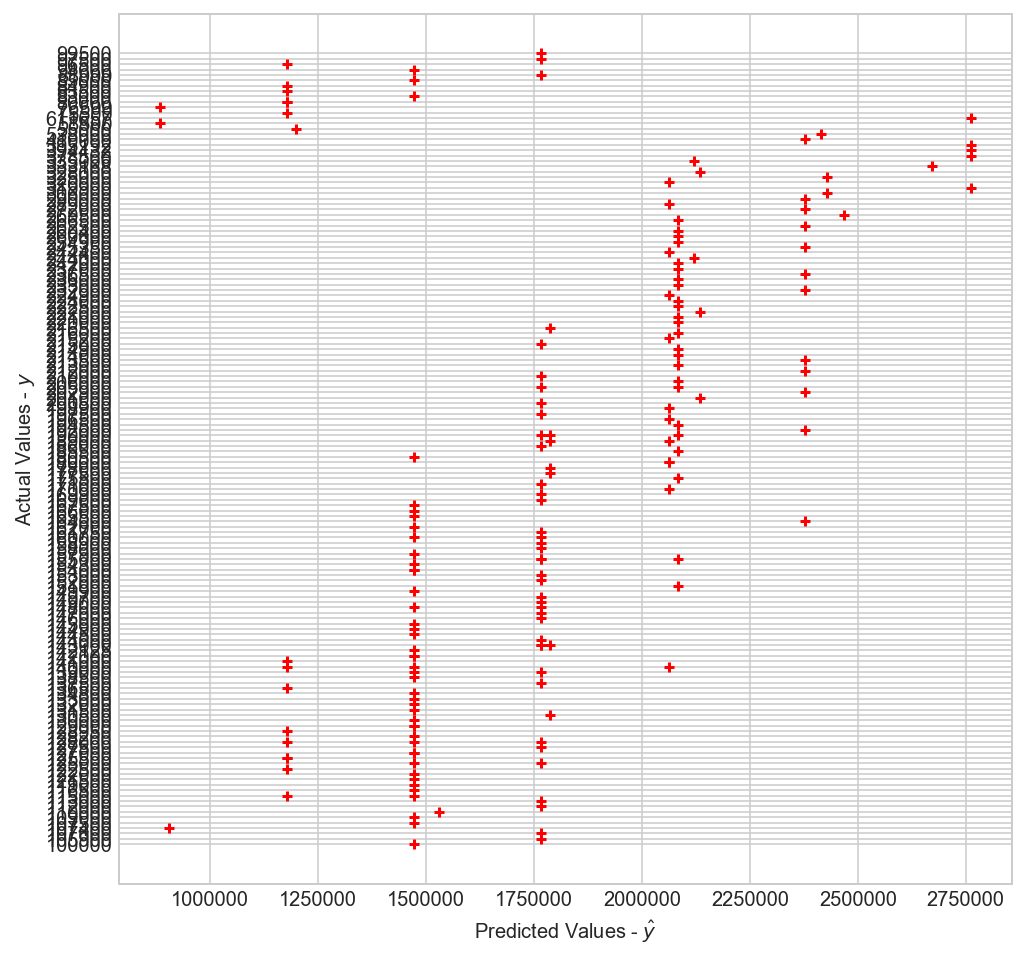

MSE: 2707086173346.21


In [469]:
import statsmodels.api as sm

model = sm.OLS(Y, renoXn_k)
model = model.fit()
predictions = model.predict(renoX_kactual)

# Plot the model.
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

In [484]:
model.summary().as_csv

<bound method Summary.as_csv of <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     403.4
Date:                Thu, 05 Apr 2018   Prob (F-statistic):          1.96e-317
Time:                        23:03:10   Log-Likelihood:                -15479.
No. Observations:                1278   AIC:                         3.097e+04
Df Residuals:                    1270   BIC:                         3.101e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

# Using the SelectKBest Method for renovate-able features, it has significantly increased to 0.69.
x1, x2, x3, x5, x6, x7 and x8 have p-score of less than 5%.
x4 is ommitted.
Since x5 and x8 have negative coef, they are ommitted too.

Ranked:
        coef 	std err	    Ratio	P>|t|
x1	294700.00	11800.00	24.97	0.00
x2	52620.00	5447.91	    9.66	0.00
x3	38570.00	5786.94	    6.67	0.00
x7	19680.00	8070.69	    2.44	0.02
x6	56740.00	26800.00	2.12	0.03

x1: 'OverallQual'
x2: 'BsmtQual_Ex'
x3: 'KitchenQual_Ex'
x4: 'BsmtCond_Po'
x5: 'Condition2_PosN'
x6: 'Street_Grvl'
x7: 'Street_Pave'
x8: 'ExterQual_TA'

The most desirable renovate-able feature is x1. For a one-unit increase in x1 (holding all other features constant), there is a 294700.00 increase in SalePrice, on top of the predicted SalePrice from the fixed features. 

I have used the coefficient to divide by the standard error to get a ratio. The higher the ratio (ie, lesser standard error in relation to its coefficient), the lesser the odd you would profit lesser money renovating this feature (ie. you will still profit but you won't profit as much). Since our renovation costs are rock-bottom in the market, renovating these features is definitely the bang for the buck. We have found our objective 2.

## Summary
For the first model (Combination method), the predicted SalePrice is ridiculous and the r^2 for renovate-able features is as good as flipping a coin.
Without much consideration, I would prefer the second model (SelectKBest), which explains r^2 at relatively higher percentage for both fixed and renovate-able features. By searching for properties that have desirable fixed and renovate-able features, we can greatly increase the profitability of the company.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

# A:
Oversampling using Synthetic Minority Oversampling Technique and followed by undersampling using Edited Nearest Neighbour

In [481]:
df = house.groupby('SaleCondition')['Id'].nunique()
df

SaleCondition
Abnorml     101
AdjLand       4
Alloca       12
Family       20
Normal     1198
Partial     125
Name: Id, dtype: int64

#Majority Class is Normal. Others are minority

In [483]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.grid.search import GridSearchCV
from sklearn.cross_validation import KFold, train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomeLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalanceCascade, EasyEnsemble
import warnings
from itable import PrettyTable, TableStyle, CellStyle
warnings.filterwarnings('ignore')
%pylab inline
pylab.rcParams['figure.figsize']=(12,6)
plt.style.use('fivethirtyeight')

ImportError: No module named grid.search

In [ ]:
#Using SMOTE +ENN
os_us =SMOTEENN(rtio=0.5, k=5, size=ngh=5, random_state=1)
X_train_rest, y_train_res = os_us.fit_sample(X_train,y_train)

print "Distribution of class labels before resampling {}".format(Counter(y_train))
print "Distribution of class labels after resamping {}".format(Counter(y_train_res))

clf_base=LogisticRegression()
grid={'C': 10.0 ** np.arange(-2,3),
     'penalty':['11','12']}

cv=KFold(X-train_res.shape[0],n_folds=5,shuffle=True,random_state=0)
clf=GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro')

clf.fit(X_train_res,y_train_res)

coef=clf.best_estimator_.coef_
intercept=clf.best_estimator_.intercept_

x1=np.linspace(-8,10,100)
x2=-(coef[0][0]*x1+intercept[0])/coef[0][1]

x_1_res=X_train_res[y_train_res=='AdjLand']
x_2_res=X_train_res[y_train_res=='Normal']

In [ ]:
plt.scatter(zip(*X_1_res)[0],zip(*X_1_res)[1],color='red')
plt.scatter(zip(*X_2_res)[0],zip(*X_2_res)[1],color='blue')

x_coords=zip(*X_1_res)[0]+zip(*X_2_res)[0]
y_coords=zip(*X_1_res)[1]+zip(*X_2_res)[1]
plt.axis([min(x_coords),max(x_coords),min(y_coords),max(y_coords)])

plt.title("SMOTE + ENN")
plt.plot(x1,x2,color='green',linewidth=2)
plt.show()


In [ ]:
print classification_report(y_test,clf.predict(X_test))